# Linear Regression from scratch

In this notebook, we are going to implement Linear Regression from scratch, but before that, you will need to be familar with NumPy, which is a popular library for working with matrix operations.

## Basics of NumPy

In [4]:
import numpy as np

In [5]:
# There are several ways to create a numpy array

# 1. Create from list
# In this case, a list of list will be converted into a 2D array
a1 = np.array([[1, 2, 3], [4, 5, 6]])

# 2. Create from tuple
a2 = np.array(
    (
        (2, 3, 4),
        (8, 9, 10),
    )
)

# 3. Create a random array with np.random.*
# For example: from uniform distribution with shape (4, 5)
a3 = np.random.rand(4, 5)

# 4. Create matrix full of 1 or 0 with np.zeros or np.ones
# For example: A full-of-one matrix with shape (4, 5)
a4 = np.ones((4, 5))

In [6]:
# How to do matrix operations

# 1. Sum
print("a1 + a2:")
print(a1 + a2)
print("*" * 20 + "\n")

# 2. Minus
print("a1 - a2:")
print(a1 - a2)
print("*" * 20 + "\n")

# 3. Transpose
print("Transpose of a1:")
print(a1.T)
print("*" * 20 + "\n")

# 4. Element-wise multiplication
print("a1 * a2:")
print(a1 * a2)
print(np.multiply(a1, a2))
print("*" * 20 + "\n")

# 5. Matrix product
print("Matrix product of a1 and a2:")
print(np.matmul(a1, a2.T))
print(np.dot(a1, a2.T))
print("*" * 20 + "\n")

# 6. Square
print("Square of a1:")
print(a1**2)
print("*" * 20 + "\n")

a1 + a2:
[[ 3  5  7]
 [12 14 16]]
********************

a1 - a2:
[[-1 -1 -1]
 [-4 -4 -4]]
********************

Transpose of a1:
[[1 4]
 [2 5]
 [3 6]]
********************

a1 * a2:
[[ 2  6 12]
 [32 45 60]]
[[ 2  6 12]
 [32 45 60]]
********************

Matrix product of a1 and a2:
[[ 20  56]
 [ 47 137]]
[[ 20  56]
 [ 47 137]]
********************

Square of a1:
[[ 1  4  9]
 [16 25 36]]
********************



## Linear Regression

Enough basics for now, let's implement Linear Regression.

In [7]:
from sklearn import datasets

# Create a fake linear dataset
X, y, coef = datasets.make_regression(
    n_samples=100,  # number of samples
    n_features=1,  # number of features
    noise=10,  # add some noise
    coef=True,  # return the coef used for generating data
    random_state=42,
)  # set for same data points for each run

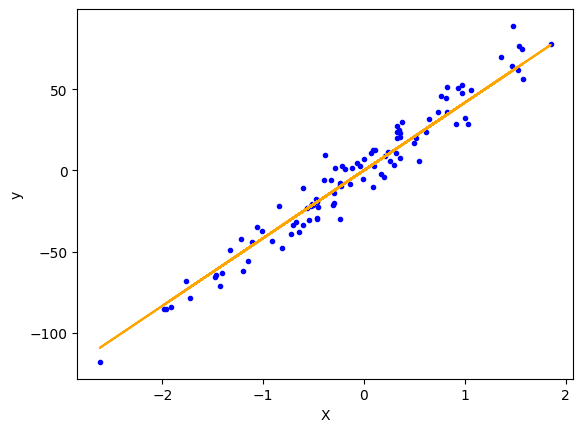

In [8]:
import matplotlib.pyplot as plt

# Declare the function which has been used to generate the data,
# which is y = ax, with a is the coef variable above
f = lambda x: coef * x

# Visualize our dataset using the matplotlib library
plt.plot(X, y, ".", color="blue")
plt.plot(X, f(X), color="orange")
plt.xlabel("X")
plt.ylabel("y")

plt.show()

The idea of applying linear regression is to draw a straight line `near` the above orange line. We will talk about what `near` really means right now ;).

A linear regression model is basically a function `f(x1, x2, ...) = a*x1 + b*x2 + ... + n`. What happened behind the term `training the model` is to find a suitable collection of parameters `(a, b, ..., n)`, so that the result of the function `f` for an arbitrary coordinate `(x1, x2, ...)` close to the result of the real function (e.g, the above orange line is the real function behind the fake dataset). 

To be more clear, let's consider a more concrete example. Imagine that we are looking for a house, and find a very beautiful one online, but the price is hidden. Luckily, you can see 2 attributes of the house, which are `area (in sq ft.)` and `the number of floors`, and you want to predict the price based on these little information. What you can do now is to set up a function `f` so that the result of this function is close to the real price of the house. Sound good?

But how to set it up? 

Let's see the code ;)

In [9]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=100):
        # Hyperparameters are needed to select before hand
        self.lr = learning_rate
        self.iterations = iterations

        # Parameters will be discovered during training
        self.weights = None  # This is (a, b, ...)
        self.bias = None  # This is n (the one is not multipled with any x)

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialize parameters with 0
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Apply gradient descent optimization algorithm
        # to find the real weights and bias
        for _ in range(self.iterations):
            # This one is equal to y = ax1 + bx2 + ... + n.
            # In each iteration, the weights and bias will be changed,
            # so that we will get another predicted y
            y_pred = np.dot(X, self.weights) + self.bias

            # Using the predicted y to update weights and bias
            dw = (1 / num_features) * np.dot(X.T, (y_pred - y))
            db = (1 / num_features) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [10]:
# Time for training our model
clf = LinearRegression()
clf.fit(X, y)

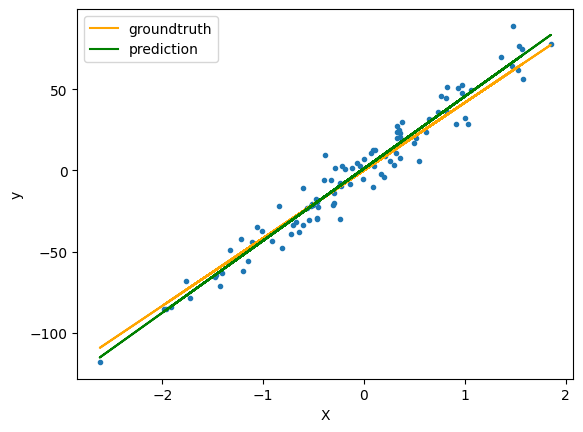

In [13]:
import matplotlib.pyplot as plt

# Declare the groundtruth (true) function
f_gt = lambda x: coef * x

# Declare our derived (predicted) function
f_pred = lambda x: clf.predict(x)

# Visualize our dataset using the matplotlib library
plt.plot(X, y, ".")
plt.plot(X, f_gt(X), color="orange", label="groundtruth")
plt.plot(X, f_pred(X), color="green", label="prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.show()

Pretty close to the real function! Now, try using a different `learning rate` or `iterations` hyperparameters to see if we can get a better result. This step is called tuning.

Most of the ML algorithms follow the same principle as the above. Each algorithm is considered as a function, and we want to find the parameters for this by using an optimization algorithm (for example, `gradient descent` in the above example). ML Researchers' jobs are often related to how to design the function and the optimization algorithm.